# __Pipeline 1__
### _Normalization --> Z Score --> 3 STD_

## __Import Data__

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [2]:
data_cat_enc = pd.read_csv('data_cat_enc.csv')

In [3]:
data_cont = pd.read_csv('data_cont.csv')

In [4]:
target_values = pd.read_csv('target_values.csv')

## __Normalization__

__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [5]:
data_cont.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
dtype: float64

In [6]:
data_cont["AdministrativeSkew"]= stats.yeojohnson(data_cont["Administrative"])[0]

In [7]:
data_cont["Administrative_DurationSkew"]= stats.yeojohnson(data_cont["Administrative_Duration"])[0]

In [8]:
data_cont["InformationalSkew"]= stats.yeojohnson(data_cont["Informational"])[0]

In [9]:
data_cont["Informational_DurationSkew"]= stats.yeojohnson(data_cont["Informational_Duration"])[0]

In [10]:
data_cont["ProductRelatedSkew"]= stats.yeojohnson(data_cont["ProductRelated"])[0]

In [11]:
data_cont["ProductRelated_DurationSkew"]= stats.yeojohnson(data_cont["ProductRelated_Duration"])[0]

In [12]:
data_cont["BounceRatesSkew"]= stats.yeojohnson(data_cont["BounceRates"])[0]

In [13]:
data_cont["ExitRatesSkew"]= stats.yeojohnson(data_cont["ExitRates"])[0]

In [14]:
data_cont["PageValuesSkew"]= stats.yeojohnson(data_cont["PageValues"])[0]

In [15]:
data_cont_norm = data_cont.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues'], axis=1)

In [16]:
data_cont_norm.skew()

AdministrativeSkew             0.243728
Administrative_DurationSkew    0.145485
InformationalSkew              1.404111
Informational_DurationSkew     1.546903
ProductRelatedSkew            -0.002576
ProductRelated_DurationSkew   -0.036336
BounceRatesSkew                1.032599
ExitRatesSkew                  0.433598
PageValuesSkew                 1.377420
dtype: float64

In [17]:
data_cont_norm['BounceRatesSkew'] = data_cont_norm['BounceRatesSkew'].apply(np.cbrt)

In [18]:
data_cont_norm['BounceRatesSkew'].skew()

0.1328499060914943

In [19]:
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)
data_cont_norm['PageValuesSkew'] = data_cont_norm['PageValuesSkew'].apply(np.sqrt)

In [20]:
data_cont_norm['PageValuesSkew'].skew()

1.3421245108260518

In [21]:
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.cbrt)
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.cbrt)
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.cbrt)
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.cbrt)

In [22]:
data_cont_norm['InformationalSkew'].skew()

1.3993479189518425

In [23]:
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)

In [24]:
data_cont_norm['Informational_DurationSkew'].skew()

1.539387901118679

In [25]:
data_cont_norm.skew()

AdministrativeSkew             0.243728
Administrative_DurationSkew    0.145485
InformationalSkew              1.399348
Informational_DurationSkew     1.539388
ProductRelatedSkew            -0.002576
ProductRelated_DurationSkew   -0.036336
BounceRatesSkew                0.132850
ExitRatesSkew                  0.433598
PageValuesSkew                 1.342125
dtype: float64

- InformationalSkew, Informational_DurationSkew, and PageValuesSkew are highly skewed because of the distribution of its values.
- The majority of the values are 0, making it very hard to correct the skewness; yeojohnson did not skew them to between -0.5 and 0.5.
- Doing it by hand after yeojohnson did not correct the skewness much more either.

## __Z Score__

In [26]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_cont_norm = scaler.fit_transform(data_cont_norm)
data_cont_transform = pd.DataFrame(data_cont_norm)

_Rename the columns back after the transformation_

In [27]:
data_cont_transform.columns=['AdministrativeSkew','Administrative_DurationSkew','InformationalSkew','Informational_DurationSkew', 
                             'ProductRelatedSkew', 'ProductRelated_DurationSkew', 'BounceRatesSkew',
                             'ExitRatesSkew', 'PageValuesSkew']

__Visualize the Results in a Boxplot:__

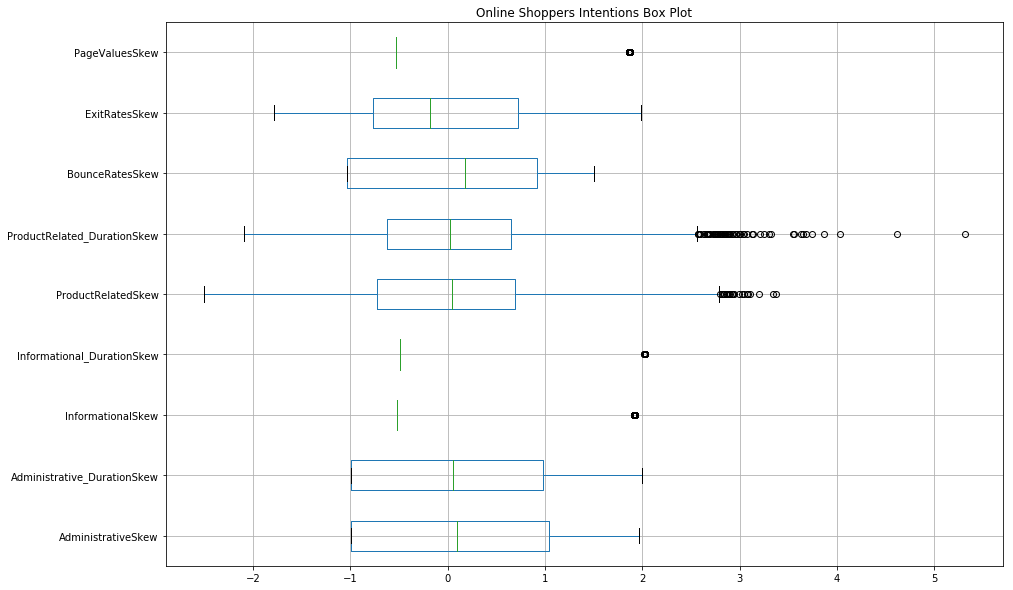

In [28]:
data_cont_transform.boxplot(vert=False, figsize=(15,10))
plt.title('Online Shoppers Intentions Box Plot')
plt.show()

- As compared to the original boxplot in the EDA, this box plot is more standardized with a smaller range of numbers.

In [29]:
data_cont_transform.describe()

,AdministrativeSkew,Administrative_DurationSkew,InformationalSkew,Informational_DurationSkew,ProductRelatedSkew,ProductRelated_DurationSkew,BounceRatesSkew,ExitRatesSkew,PageValuesSkew
count,1.233000e+04,1.233000e+04,1.233000e+04,12330.000000,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-1.872882e-16,2.189832e-17,-9.220344e-18,0.000000,4.056951e-16,-2.489493e-16,5.186443e-17,9.681361e-17,6.569495e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-9.901281e-01,-9.966585e-01,-5.208311e-01,-0.492257,-2.510230e+00,-2.096783e+00,-1.036838e+00,-1.785861e+00,-5.332682e-01
25%,-9.901281e-01,-9.966585e-01,-5.208311e-01,-0.492257,-7.226106e-01,-6.242660e-01,-1.036838e+00,-7.685399e-01,-5.332682e-01
50%,9.173732e-02,5.230410e-02,-5.208311e-01,-0.492257,4.187334e-02,2.792895e-02,1.730725e-01,-1.855159e-01,-5.332682e-01
75%,1.040186e+00,9.814307e-01,-5.208311e-01,-0.492257,6.869881e-01,6.547706e-01,9.221769e-01,7.224596e-01,-5.332682e-01
max,1.964995e+00,1.995243e+00,1.921048e+00,2.031940,3.375326e+00,5.313616e+00,1.503281e+00,1.982547e+00,1.875522e+00


### __3 STD__

__Set the Upper Bound to 3 Standard Deviations Above the Mean:__

In [30]:
for col in data_cont_transform.columns:
    u_bound = data_cont_transform[col].mean() + 3* data_cont_transform[col].std()
    data_cont_transform[col][data_cont_transform[col] > u_bound] = u_bound

__Set the Lower Bound to 3 Standard Deviations Below the Mean:__

In [31]:
for col in data_cont_transform.columns:
    l_bound = data_cont_transform[col].mean() - 3*data_cont_transform[col].std()
    data_cont_transform[col][data_cont_transform[col] < l_bound] = l_bound

__Visualize the Results in a Boxplot:__

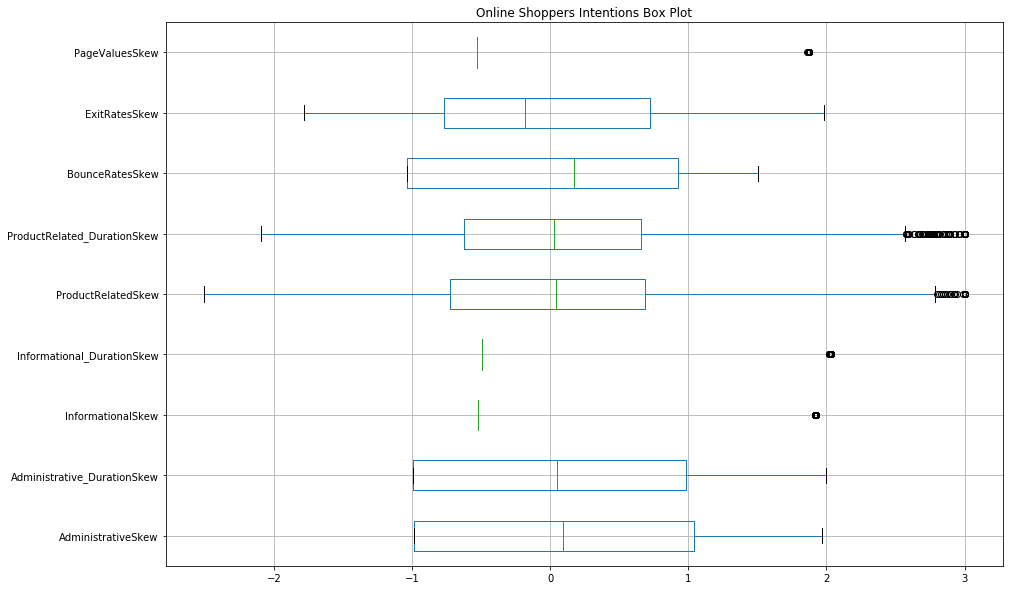

In [32]:
data_cont_transform.boxplot(vert=False, figsize=(15,10))
plt.title('Online Shoppers Intentions Box Plot')
plt.show()

- The 3 Standard Deviation transformation standardized the results even further than the Z Score code did. - These two box plots for 3STD and Zscore help to visualize the changes that have been made. In the Zscore code, the max value on x axis is 5 (due to ProductRelated_DurationSkew), and after running the Z Score transformation, the max value of the x axis becomes 3.
- Any value above 3 was removed through Zscore, which even removed some outliers from the ProductRelated_DurationSkew column.

### __Correlation__

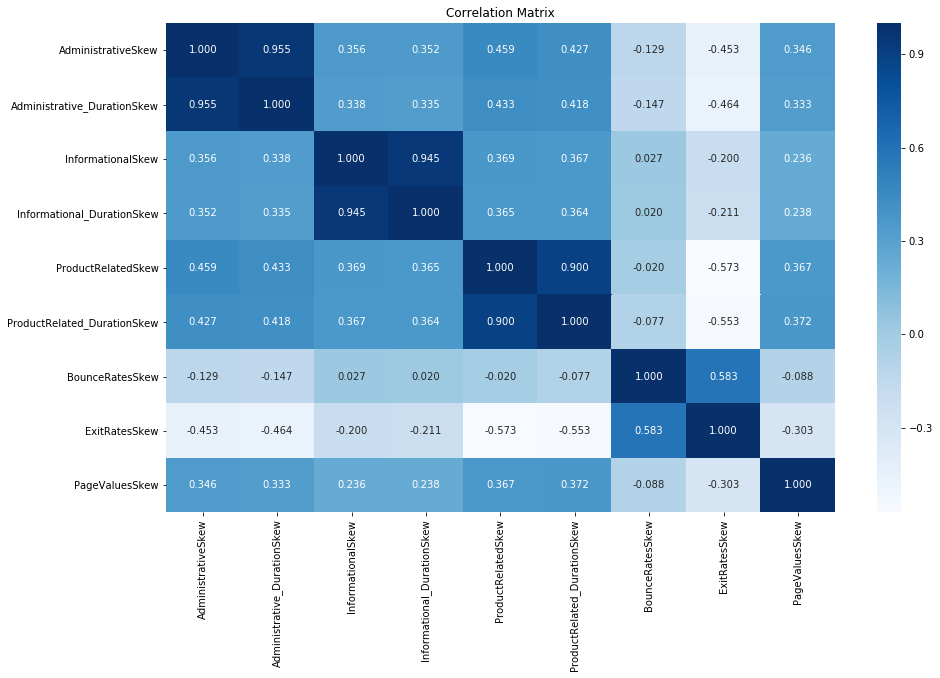

In [33]:
corr = data_cont_transform.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

__Final DataFrame__

- Connect all 3 dataframes back together and save them as a csv

In [34]:
pipeline1 = pd.concat([data_cont_transform,data_cat_enc,target_values], axis=1)
pipeline1.head()

,AdministrativeSkew,Administrative_DurationSkew,InformationalSkew,Informational_DurationSkew,ProductRelatedSkew,ProductRelated_DurationSkew,BounceRatesSkew,ExitRatesSkew,PageValuesSkew,SpecialDay_0.0,...,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,SeasonBins_1,SeasonBins_2,SeasonBins_3,SeasonBins_4,RevenueEnc
0,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.503281,1.982547,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
1,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.074189,-1.036838,1.569866,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
2,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.503281,1.982547,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
3,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.875436,1.354717,1.832073,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
4,-0.990128,-0.996659,-0.520831,-0.492257,-0.442610,0.057515,1.002737,0.722460,-0.533268,1,...,0,0,1,0,1,1,0,0,0,0


In [35]:
pipeline1.to_csv('../project2-deadlinedemons/pipeline1.csv', index=0)